<a href="https://colab.research.google.com/github/Code-With-Aagam/Brain-Tumor-Detection-using-Image-Segementation/blob/main/brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PACKAGES AND LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image

# IGNORING UNNECESSARRY WARNINGS

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

# PATH PROCESS

#### TRAIN

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
No_Data_Path = Path("/content/drive/MyDrive/Minor Project/no")
Yes_Data_Path = Path("/content/drive/MyDrive/Minor Project/yes")

In [7]:
No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [8]:
print(No_JPG_Path[0:5])
print("-----"*20)
print(Yes_JPG_Path[0:5])

[PosixPath('/content/drive/MyDrive/Minor Project/no/no1423.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/no/no1429.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/no/no1438.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/no/no1460.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/no/no1449.jpg')]
----------------------------------------------------------------------------------------------------
[PosixPath('/content/drive/MyDrive/Minor Project/yes/y1430.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/yes/y1470.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/yes/y1465.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/yes/y1459.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/yes/y146.jpg')]


In [9]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)

for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [10]:
print(Yes_No_List[0:10])

[PosixPath('/content/drive/MyDrive/Minor Project/no/no1423.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/no/no1429.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/no/no1438.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/no/no1460.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/no/no1449.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/no/no1458.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/no/no1461.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/no/no1457.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/no/no1451.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/no/no1455.jpg')]


In [11]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [12]:
print(JPG_Labels[0:10])

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [13]:
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))

NO COUNTING:  1500
YES COUNTING:  1500


In [14]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [15]:
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)

In [16]:
print(Main_Train_Data.head(-1))

                                                    JPG TUMOR_CATEGORY
0     /content/drive/MyDrive/Minor Project/no/no1423...             no
1     /content/drive/MyDrive/Minor Project/no/no1429...             no
2     /content/drive/MyDrive/Minor Project/no/no1438...             no
3     /content/drive/MyDrive/Minor Project/no/no1460...             no
4     /content/drive/MyDrive/Minor Project/no/no1449...             no
...                                                 ...            ...
2994  /content/drive/MyDrive/Minor Project/yes/y1448...            yes
2995  /content/drive/MyDrive/Minor Project/yes/y1432...            yes
2996  /content/drive/MyDrive/Minor Project/yes/y1442...            yes
2997  /content/drive/MyDrive/Minor Project/yes/y1445...            yes
2998  /content/drive/MyDrive/Minor Project/yes/y1446...            yes

[2999 rows x 2 columns]


#### TEST

In [17]:
Prediction_Path = Path("/content/drive/MyDrive/Minor Project/pred")

In [18]:
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))

In [19]:
print(Test_JPG_Path[0:2])

[PosixPath('/content/drive/MyDrive/Minor Project/pred/pred17.jpg'), PosixPath('/content/drive/MyDrive/Minor Project/pred/pred0.jpg')]


In [20]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [21]:
print(Test_JPG_Labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [22]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [24]:
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [25]:
print(Test_Data.head())

                                                 JPG TUMOR_CATEGORY
0  /content/drive/MyDrive/Minor Project/pred/pred...           pred
1  /content/drive/MyDrive/Minor Project/pred/pred...           pred
2  /content/drive/MyDrive/Minor Project/pred/pred...           pred
3  /content/drive/MyDrive/Minor Project/pred/pred...           pred
4  /content/drive/MyDrive/Minor Project/pred/pred...           pred


# SHUFFLING

In [26]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [27]:
print(Main_Train_Data.head(-1))

                                                    JPG TUMOR_CATEGORY
0     /content/drive/MyDrive/Minor Project/yes/y1278...            yes
1     /content/drive/MyDrive/Minor Project/no/no946.jpg             no
2     /content/drive/MyDrive/Minor Project/yes/y750.jpg            yes
3     /content/drive/MyDrive/Minor Project/yes/y778.jpg            yes
4     /content/drive/MyDrive/Minor Project/yes/y606.jpg            yes
...                                                 ...            ...
2994  /content/drive/MyDrive/Minor Project/yes/y1291...            yes
2995  /content/drive/MyDrive/Minor Project/yes/y1406...            yes
2996  /content/drive/MyDrive/Minor Project/yes/y625.jpg            yes
2997  /content/drive/MyDrive/Minor Project/no/no793.jpg             no
2998  /content/drive/MyDrive/Minor Project/no/no627.jpg             no

[2999 rows x 2 columns]


# VISUALIZATION

Text(0.5, 1.0, 'yes')

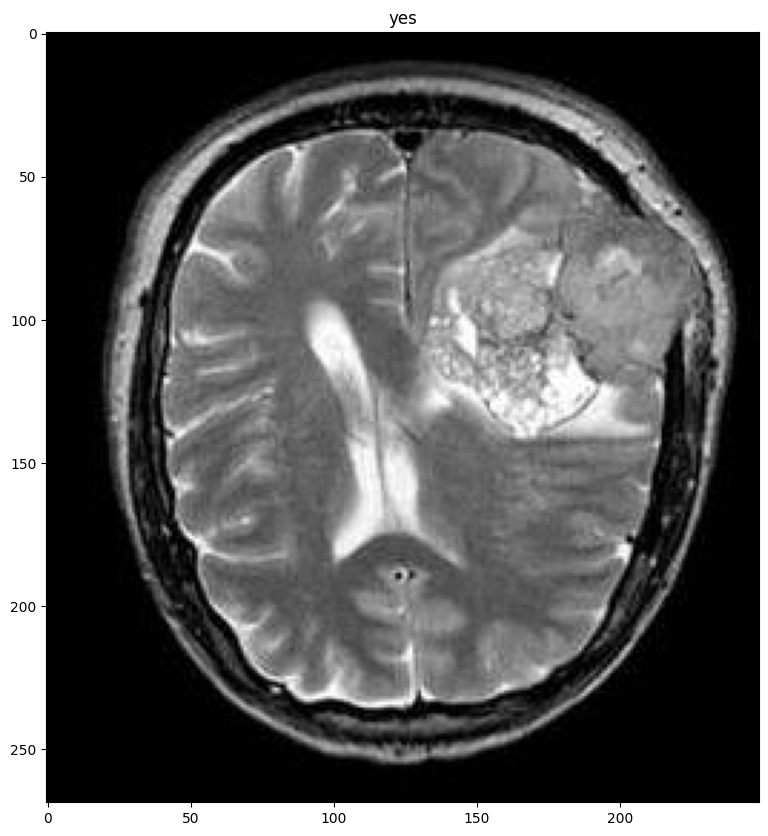

In [28]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][10]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])

Text(0.5, 1.0, 'no')

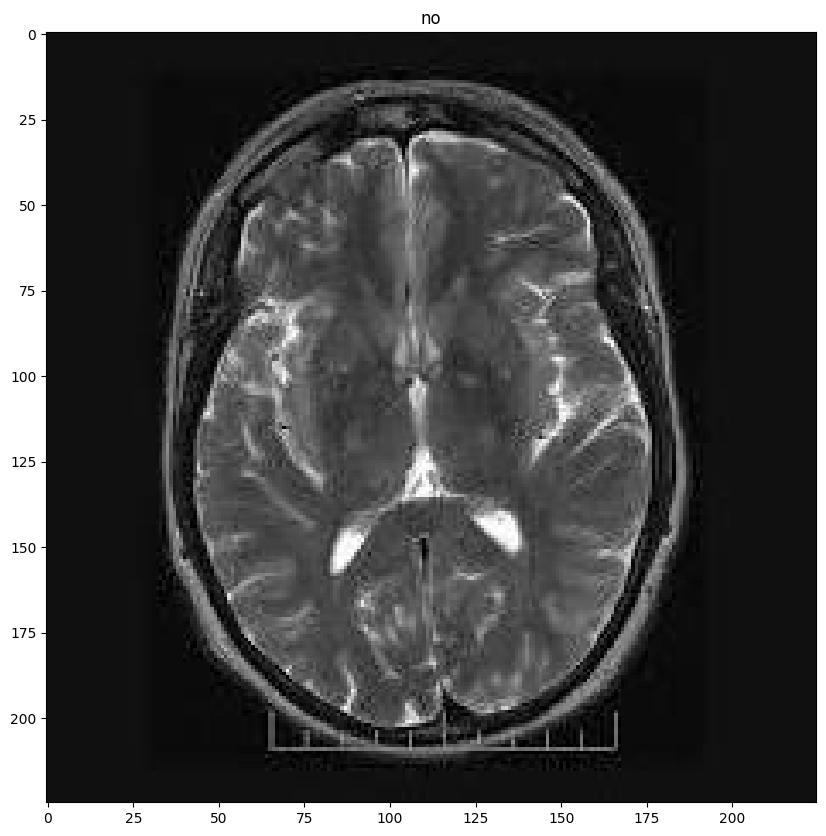

In [29]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][2997]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][2997])

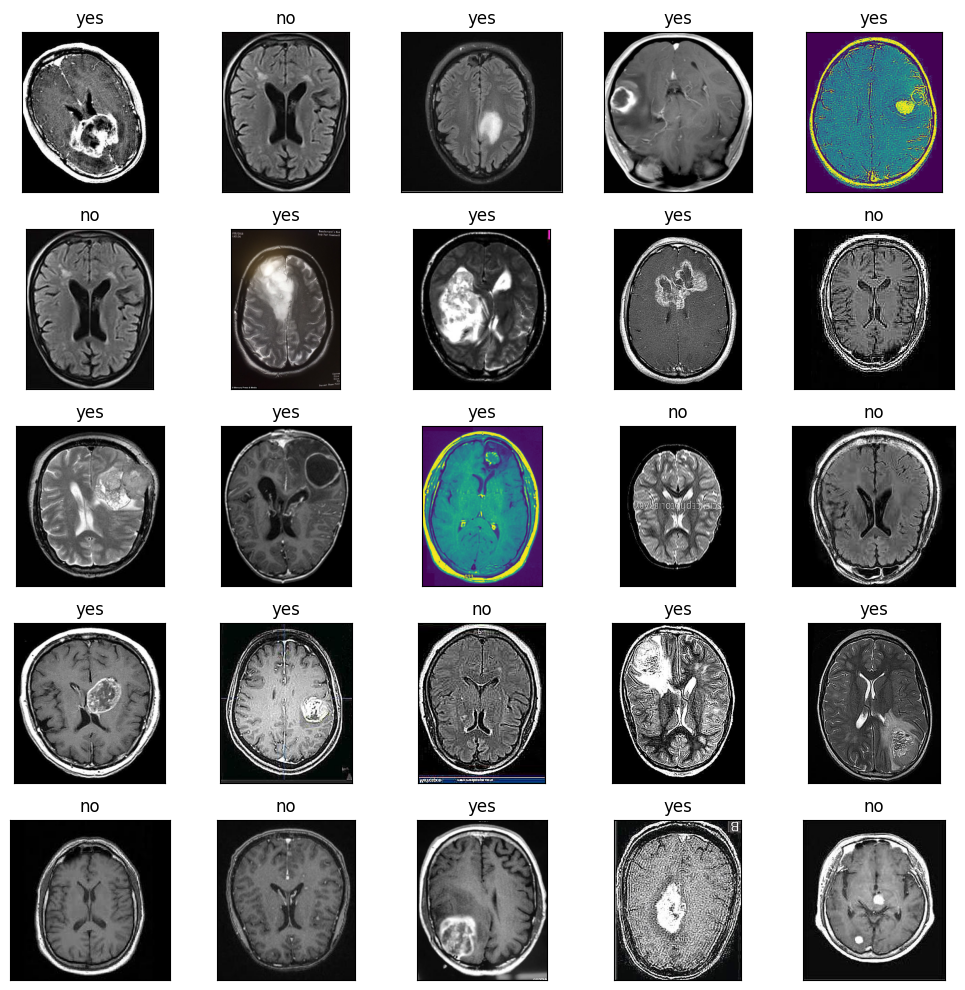

In [30]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

# MODEL TRAINING DATA

In [31]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [32]:
print(train_data.shape)

(2700, 2)


In [33]:
print(train_data.head())

                                                    JPG TUMOR_CATEGORY
433   /content/drive/MyDrive/Minor Project/yes/y1089...            yes
1151  /content/drive/MyDrive/Minor Project/no/no205.jpg             no
73    /content/drive/MyDrive/Minor Project/yes/y367.jpg            yes
1536  /content/drive/MyDrive/Minor Project/yes/y1438...            yes
2709  /content/drive/MyDrive/Minor Project/yes/y488.jpg            yes


In [34]:
print(test_data.shape)

(300, 2)


In [35]:
print(test_data.head())

                                                    JPG TUMOR_CATEGORY
1801  /content/drive/MyDrive/Minor Project/no/no1355...             no
1190  /content/drive/MyDrive/Minor Project/no/no783.jpg             no
1817  /content/drive/MyDrive/Minor Project/yes/y514.jpg            yes
251     /content/drive/MyDrive/Minor Project/no/no8.jpg             no
2505   /content/drive/MyDrive/Minor Project/no/no60.jpg             no


# IMAGE DATA GENERATOR WITHOUT AGUMENTATION

#### BASED ON TRAIN DATA

In [36]:
Generator_Basic = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.1)

In [37]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [38]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [39]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 300 validated image filenames belonging to 2 classes.


#### CHECKING

In [40]:
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [41]:
for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [42]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [43]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 1, 0, 0, 1]
(200, 200, 1)


In [44]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 0, 1, 1, 1]
(200, 200, 1)


In [45]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 0, 1, 0, 0]
(200, 200, 1)


# CNN MODEL

#### MODEL STRUCTURE

In [46]:
Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512,activation="relu"))
Model.add(Dense(2,activation="softmax"))

#### MODEL COMPILE

In [48]:
Model.compile(optimizer=RMSprop(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

#### MODEL FITTING

In [49]:
ANN_Model = Model.fit(Train_Set,validation_data=Validation_Set,
                      epochs=30,steps_per_epoch=120)

Epoch 1/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 674s 6s/step - accuracy: 0.6347 - loss: 1.4881 - val_accuracy: 0.7481 - val_loss: 0.5050
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7500 - loss: 0.5109 - val_accuracy: 0.7963 - val_loss: 0.4902
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 26s 137ms/step - accuracy: 0.7991 - loss: 0.4740 - val_accuracy: 0.8630 - val_loss: 0.3554
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7744 - loss: 0.4424 - val_accuracy: 0.8926 - val_loss: 0.3274
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.8441 - loss: 0.3616 - val_accuracy: 0.9148 - val_loss: 0.2589
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8756 - loss: 0.2501 - val_accuracy: 0.9074 - val_loss: 0.2447
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.8760 - loss: 0.2864 - val_accuracy: 0.9222 - val_loss: 0.2202
Epoch 8/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8996 - loss: 0.2868 - val_acc

#### MODEL SUMMARY

In [50]:
print(Model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 196, 196, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 96, 96, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      13,107,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,994,182 (102.97 MB)

 Trainable params: 13,497,090 (51.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,497,092 (51.49 MB)

None


#### CHECKING MODEL WITH GRAPHIC

In [51]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

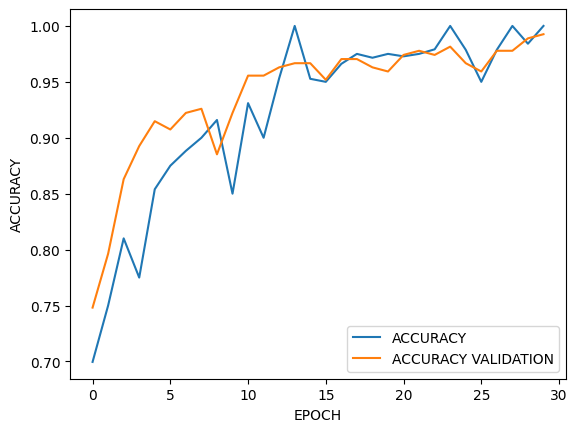

In [52]:
plt.plot(ANN_Model.history["accuracy"],label ="ACCURACY")
plt.plot(ANN_Model.history["val_accuracy"],label = "ACCURACY VALIDATION")
plt.ylabel("ACCURACY")
plt.xlabel("EPOCH")
plt.legend()
plt.show()

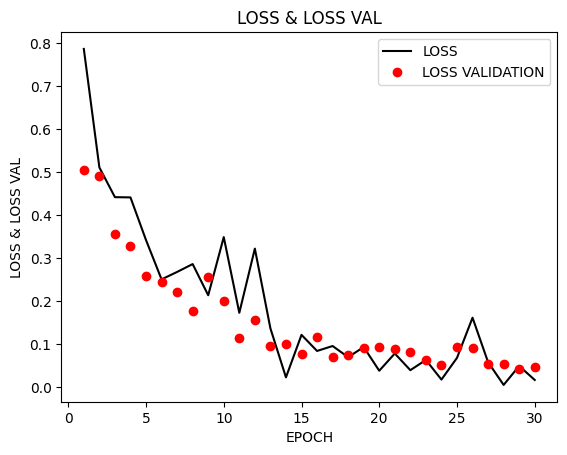

In [53]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"ro",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

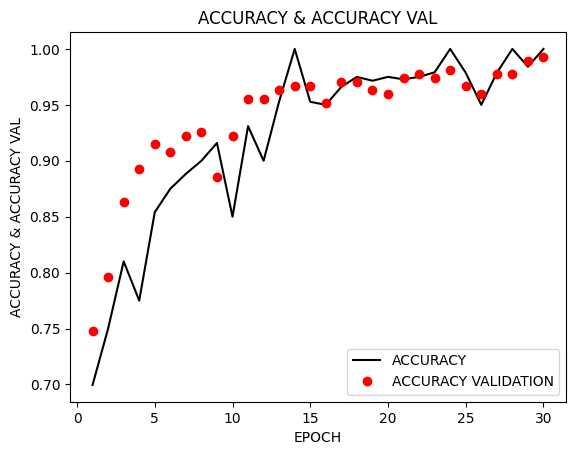

In [54]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"ro",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

Text(0, 0.5, 'ACC,ACC VAL,LOSS & LOSS VAL')

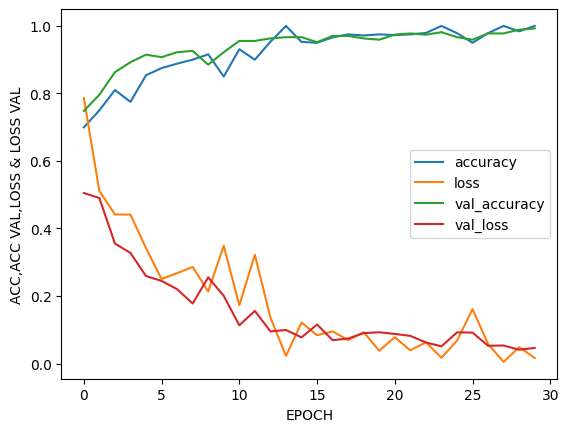

In [55]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()
plt.xlabel("EPOCH")
plt.ylabel("ACC,ACC VAL,LOSS & LOSS VAL")

#### PREDICTION SCORE ON DIVIDED DATA

#### PREDICTION PROCESS

In [56]:
Main_Data_Prediction = pd.DataFrame({"JPG":Test_JPG_Path_Series})

In [57]:
print(Main_Data_Prediction.head())

                                                 JPG
0  /content/drive/MyDrive/Minor Project/pred/pred...
1  /content/drive/MyDrive/Minor Project/pred/pred...
2  /content/drive/MyDrive/Minor Project/pred/pred...
3  /content/drive/MyDrive/Minor Project/pred/pred...
4  /content/drive/MyDrive/Minor Project/pred/pred...


In [58]:
Main_Test_Generator = ImageDataGenerator(rescale=1./255)

In [59]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [60]:
Model_Test_Prediction = Model.predict(Main_Test_Set)

3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step


In [61]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [62]:
print(Model_Test_Prediction)

[1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0
 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0]


In [63]:
Last_Prediction = []
[Last_Prediction.append('NO') if i == 1 else Last_Prediction.append('TUMOR') for i in Model_Test_Prediction]
print(Last_Prediction)

['NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR']


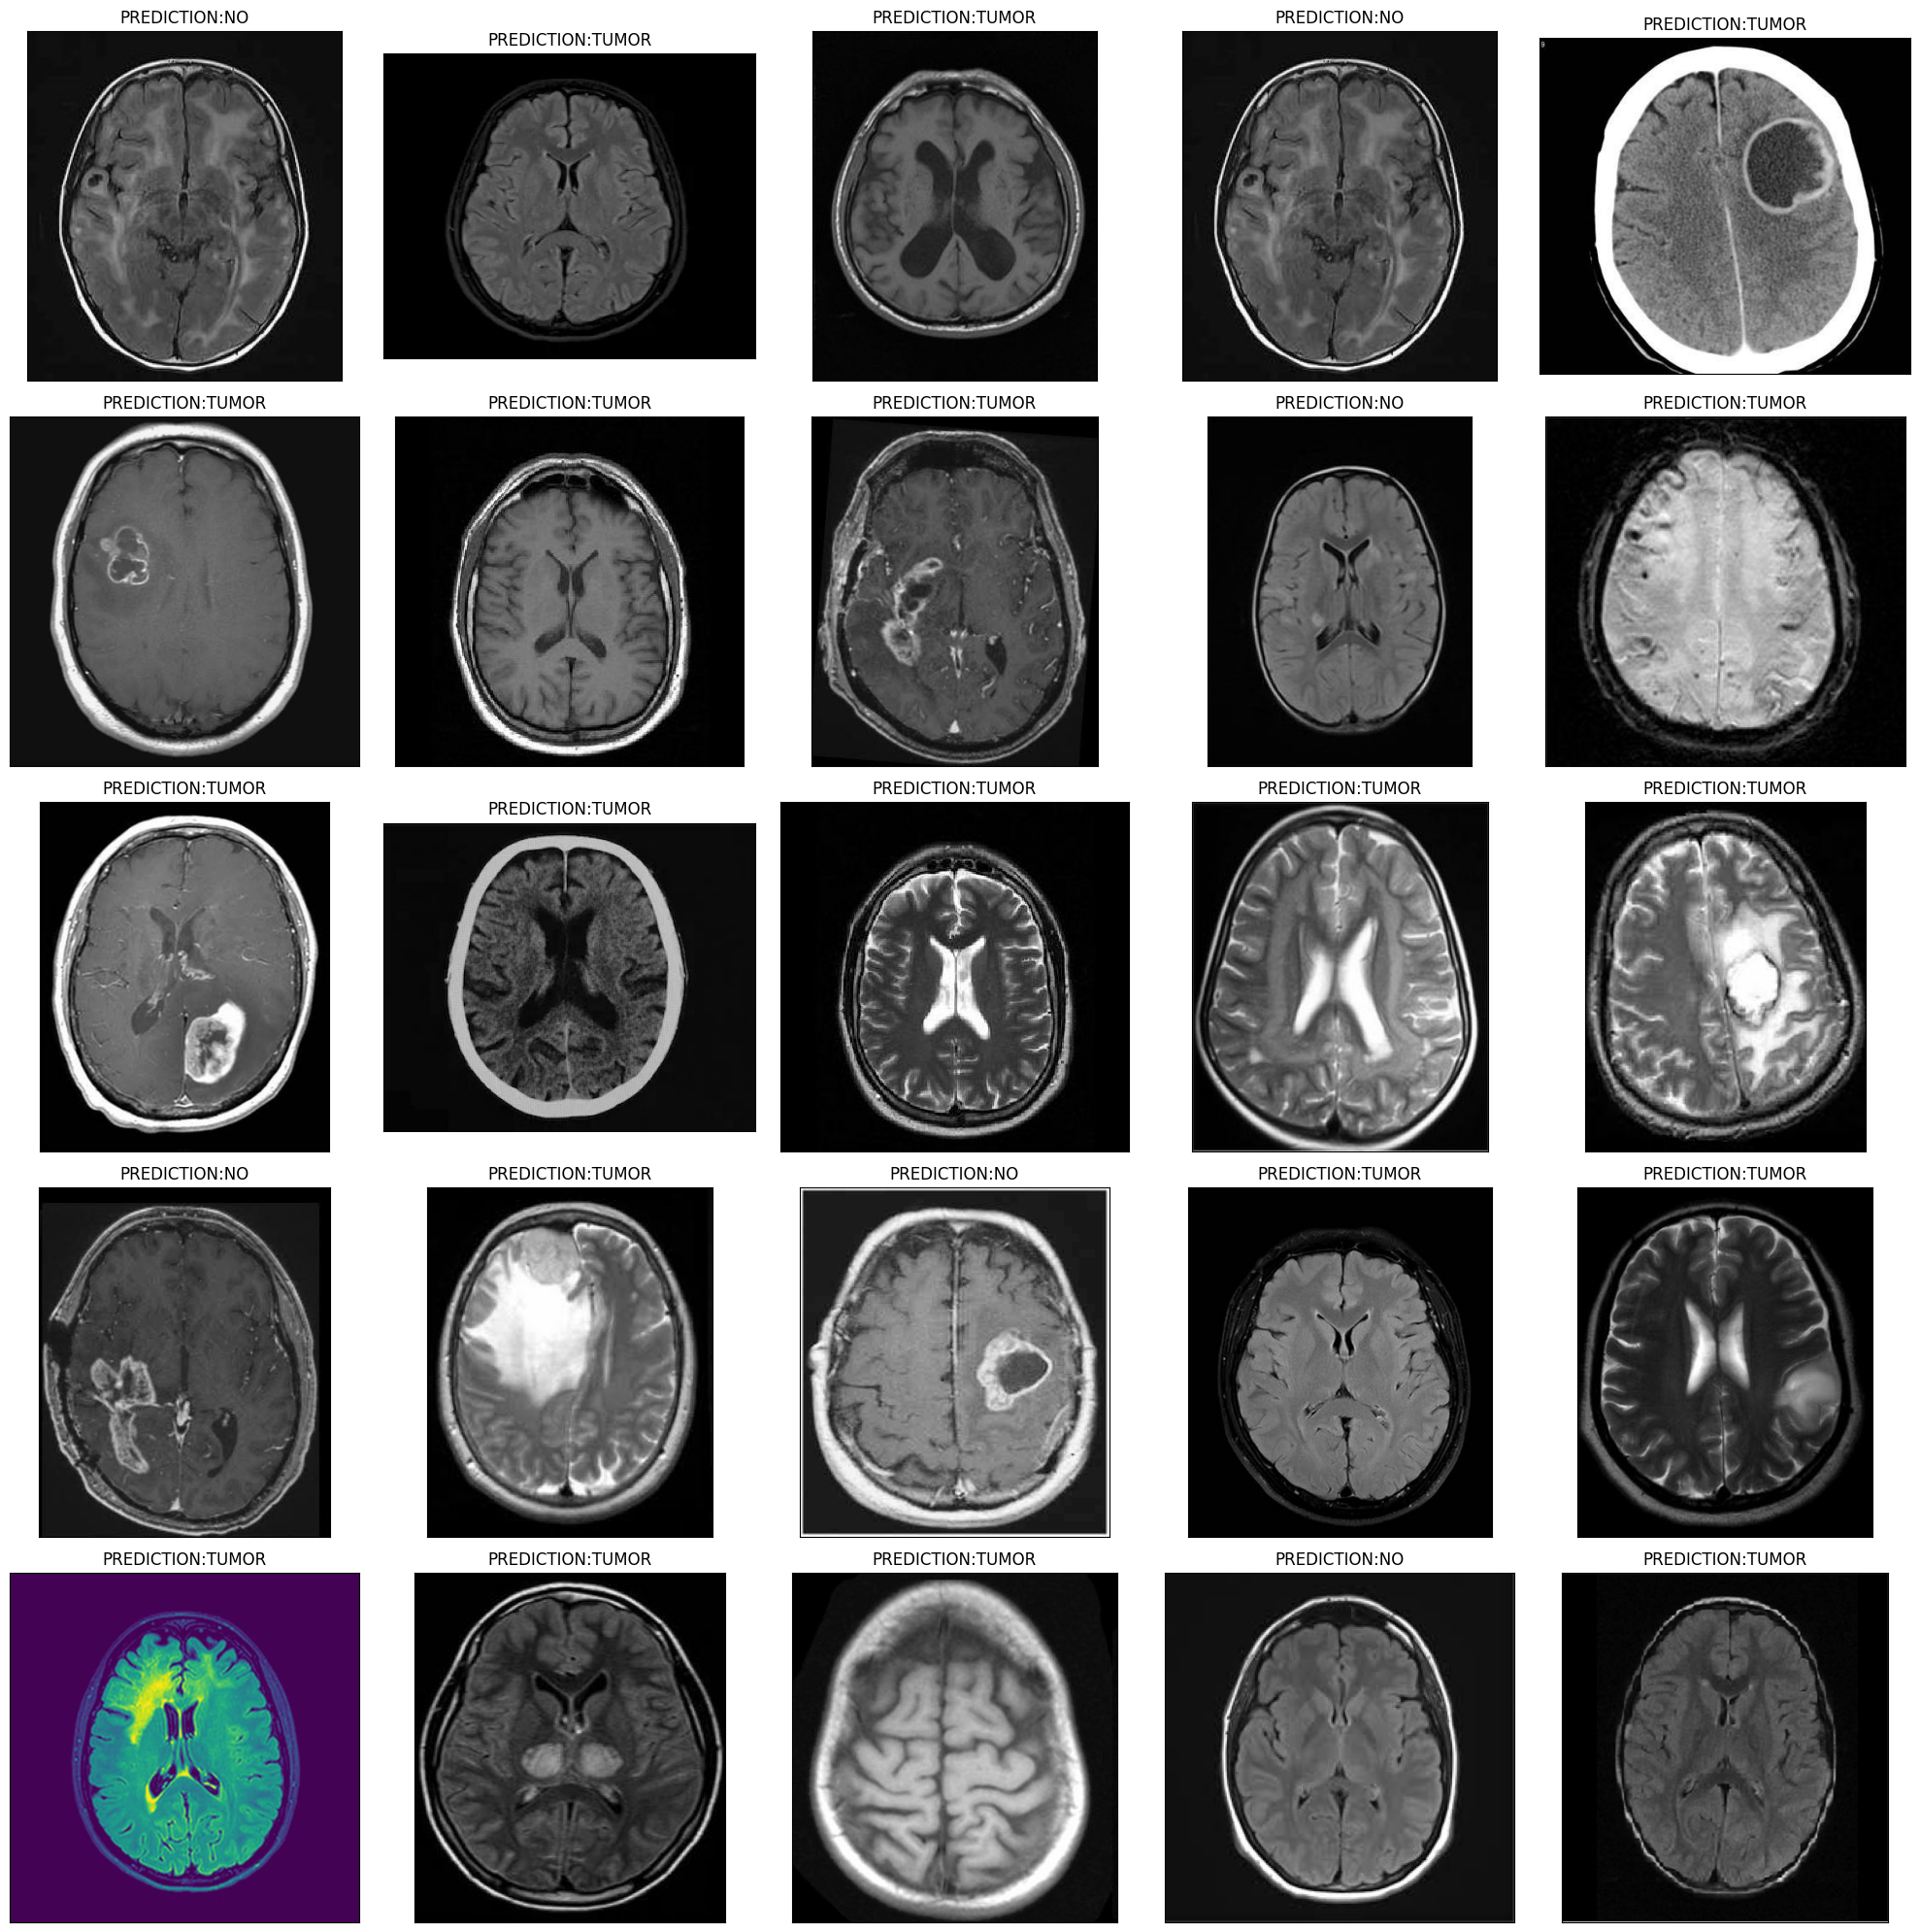

In [64]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction[i]}")
plt.tight_layout()
plt.show()

# IMAGE DATA GENERATOR WITH AGUMENTATION

In [66]:
Data_Generator_Div = ImageDataGenerator(rescale=1./255,brightness_range=[0.3,0.9],
                                       rotation_range=30,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode="nearest",
                                       validation_split=0.1)

In [67]:
Train_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [68]:
Validation_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


# CNN MODEL WITH AGUMENTATION

#### MODEL STRUCTURE

In [69]:
Model_Two = Sequential()

Model_Two.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(64,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(256,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Flatten())
Model_Two.add(Dropout(0.5))
Model_Two.add(Dense(512,activation="relu"))
Model_Two.add(Dense(2,activation="softmax"))

#### MODEL COMPILE

In [71]:
Model_Two.compile(optimizer=RMSprop(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

#### MODEL FITTING

In [72]:
ANN_Model_Two = Model_Two.fit(Train_Set_Div,
                              validation_data=Validation_Set_Div,
                              batch_size=20,
                      epochs=50)

Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 28s 202ms/step - accuracy: 0.5037 - loss: 0.6991 - val_accuracy: 0.6926 - val_loss: 0.6348
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - accuracy: 0.6273 - loss: 0.6558 - val_accuracy: 0.6519 - val_loss: 0.6677
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.6590 - loss: 0.6332 - val_accuracy: 0.6778 - val_loss: 0.6108
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 176ms/step - accuracy: 0.6648 - loss: 0.6167 - val_accuracy: 0.6926 - val_loss: 0.5685
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 168ms/step - accuracy: 0.7156 - loss: 0.5674 - val_accuracy: 0.6926 - val_loss: 0.6340
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 176ms/step - accuracy: 0.7122 - loss: 0.5733 - val_accuracy: 0.7630 - val_loss: 0.5056
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 42s 183ms/step - accuracy: 0.7389 - loss: 0.5435 - val_accuracy: 0.7741 - val_loss: 0.5079
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.7330 - loss: 0

#### MODEL SUMMARY

In [73]:
print(Model_Two.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 196, 196, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 96, 96, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,269,254 (20.10 MB)

 Trainable params: 2,634,626 (10.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,634,628 (10.05 MB)

None


#### CHECKING MODEL WITH GRAPHIC

In [74]:
HistoryDict_Two = ANN_Model_Two.history

val_losses_Two = HistoryDict_Two["val_loss"]
val_acc_Two = HistoryDict_Two["val_accuracy"]
acc_Two = HistoryDict_Two["accuracy"]
losses_Two = HistoryDict_Two["loss"]
epochs_Two = range(1,len(val_losses_Two)+1)

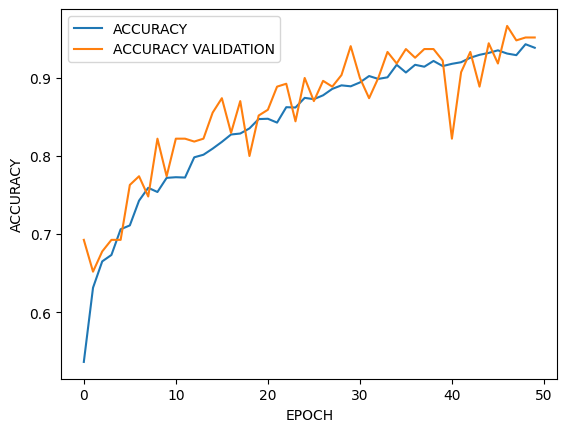

In [75]:
plt.plot(ANN_Model_Two.history["accuracy"],label="ACCURACY")
plt.plot(ANN_Model_Two.history["val_accuracy"],label ="ACCURACY VALIDATION")
plt.ylabel("ACCURACY")
plt.xlabel("EPOCH")
plt.legend()
plt.show()

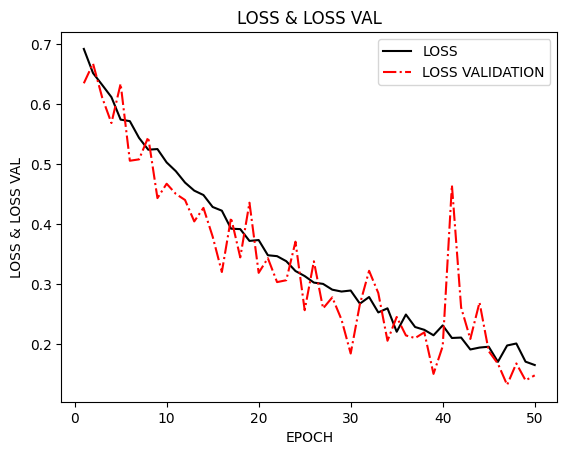

In [76]:
plt.plot(epochs_Two,losses_Two,"k-",label="LOSS")
plt.plot(epochs_Two,val_losses_Two,"r-.",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

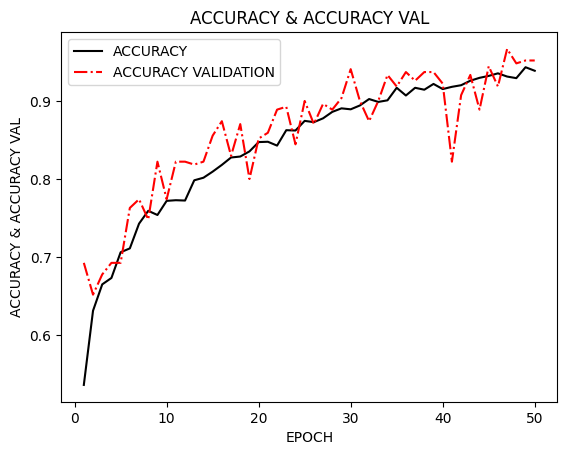

In [77]:
plt.plot(epochs_Two,acc_Two,"k-",label="ACCURACY")
plt.plot(epochs_Two,val_acc_Two,"r-.",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

Text(0, 0.5, 'ACC,ACC VAL,LOSS & LOSS VAL')

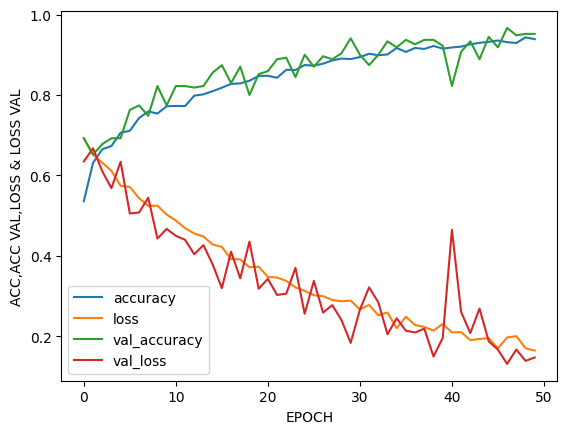

In [78]:
Dict_Summary_Two = pd.DataFrame(ANN_Model_Two.history)
Dict_Summary_Two.plot()
plt.xlabel("EPOCH")
plt.ylabel("ACC,ACC VAL,LOSS & LOSS VAL")

#### PREDICTION SCORE ON DIVIDED DATA

In [79]:
Model_Results_Two = Model_Two.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results_Two[0])
print("ACCURACY:  " + "%.2f" % Model_Results_Two[1])

LOSS:  0.0882
ACCURACY:  0.96


In [81]:
Test_Set_Div = Data_Generator_Div.flow_from_dataframe(
    dataframe=test_data,
    x_col="JPG",
    y_col="TUMOR_CATEGORY",
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation", # change to 'validation' or similar
    batch_size=20,
    target_size=(200, 200)
)

Found 30 validated image filenames belonging to 2 classes.


#### PREDICTION PROCESS

In [82]:
Model_Test_Prediction_Two = Model_Two.predict(Test_Set_Div)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step


In [83]:
Model_Test_Prediction_Two = Model_Test_Prediction_Two.argmax(axis=-1)

In [84]:
print(Model_Test_Prediction_Two)

[1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1]


In [85]:
Last_Prediction_Two = []
[Last_Prediction_Two.append('NO') if i == 1 else Last_Prediction_Two.append('TUMOR') for i in Model_Test_Prediction_Two]
print(Last_Prediction_Two)

['NO', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO']


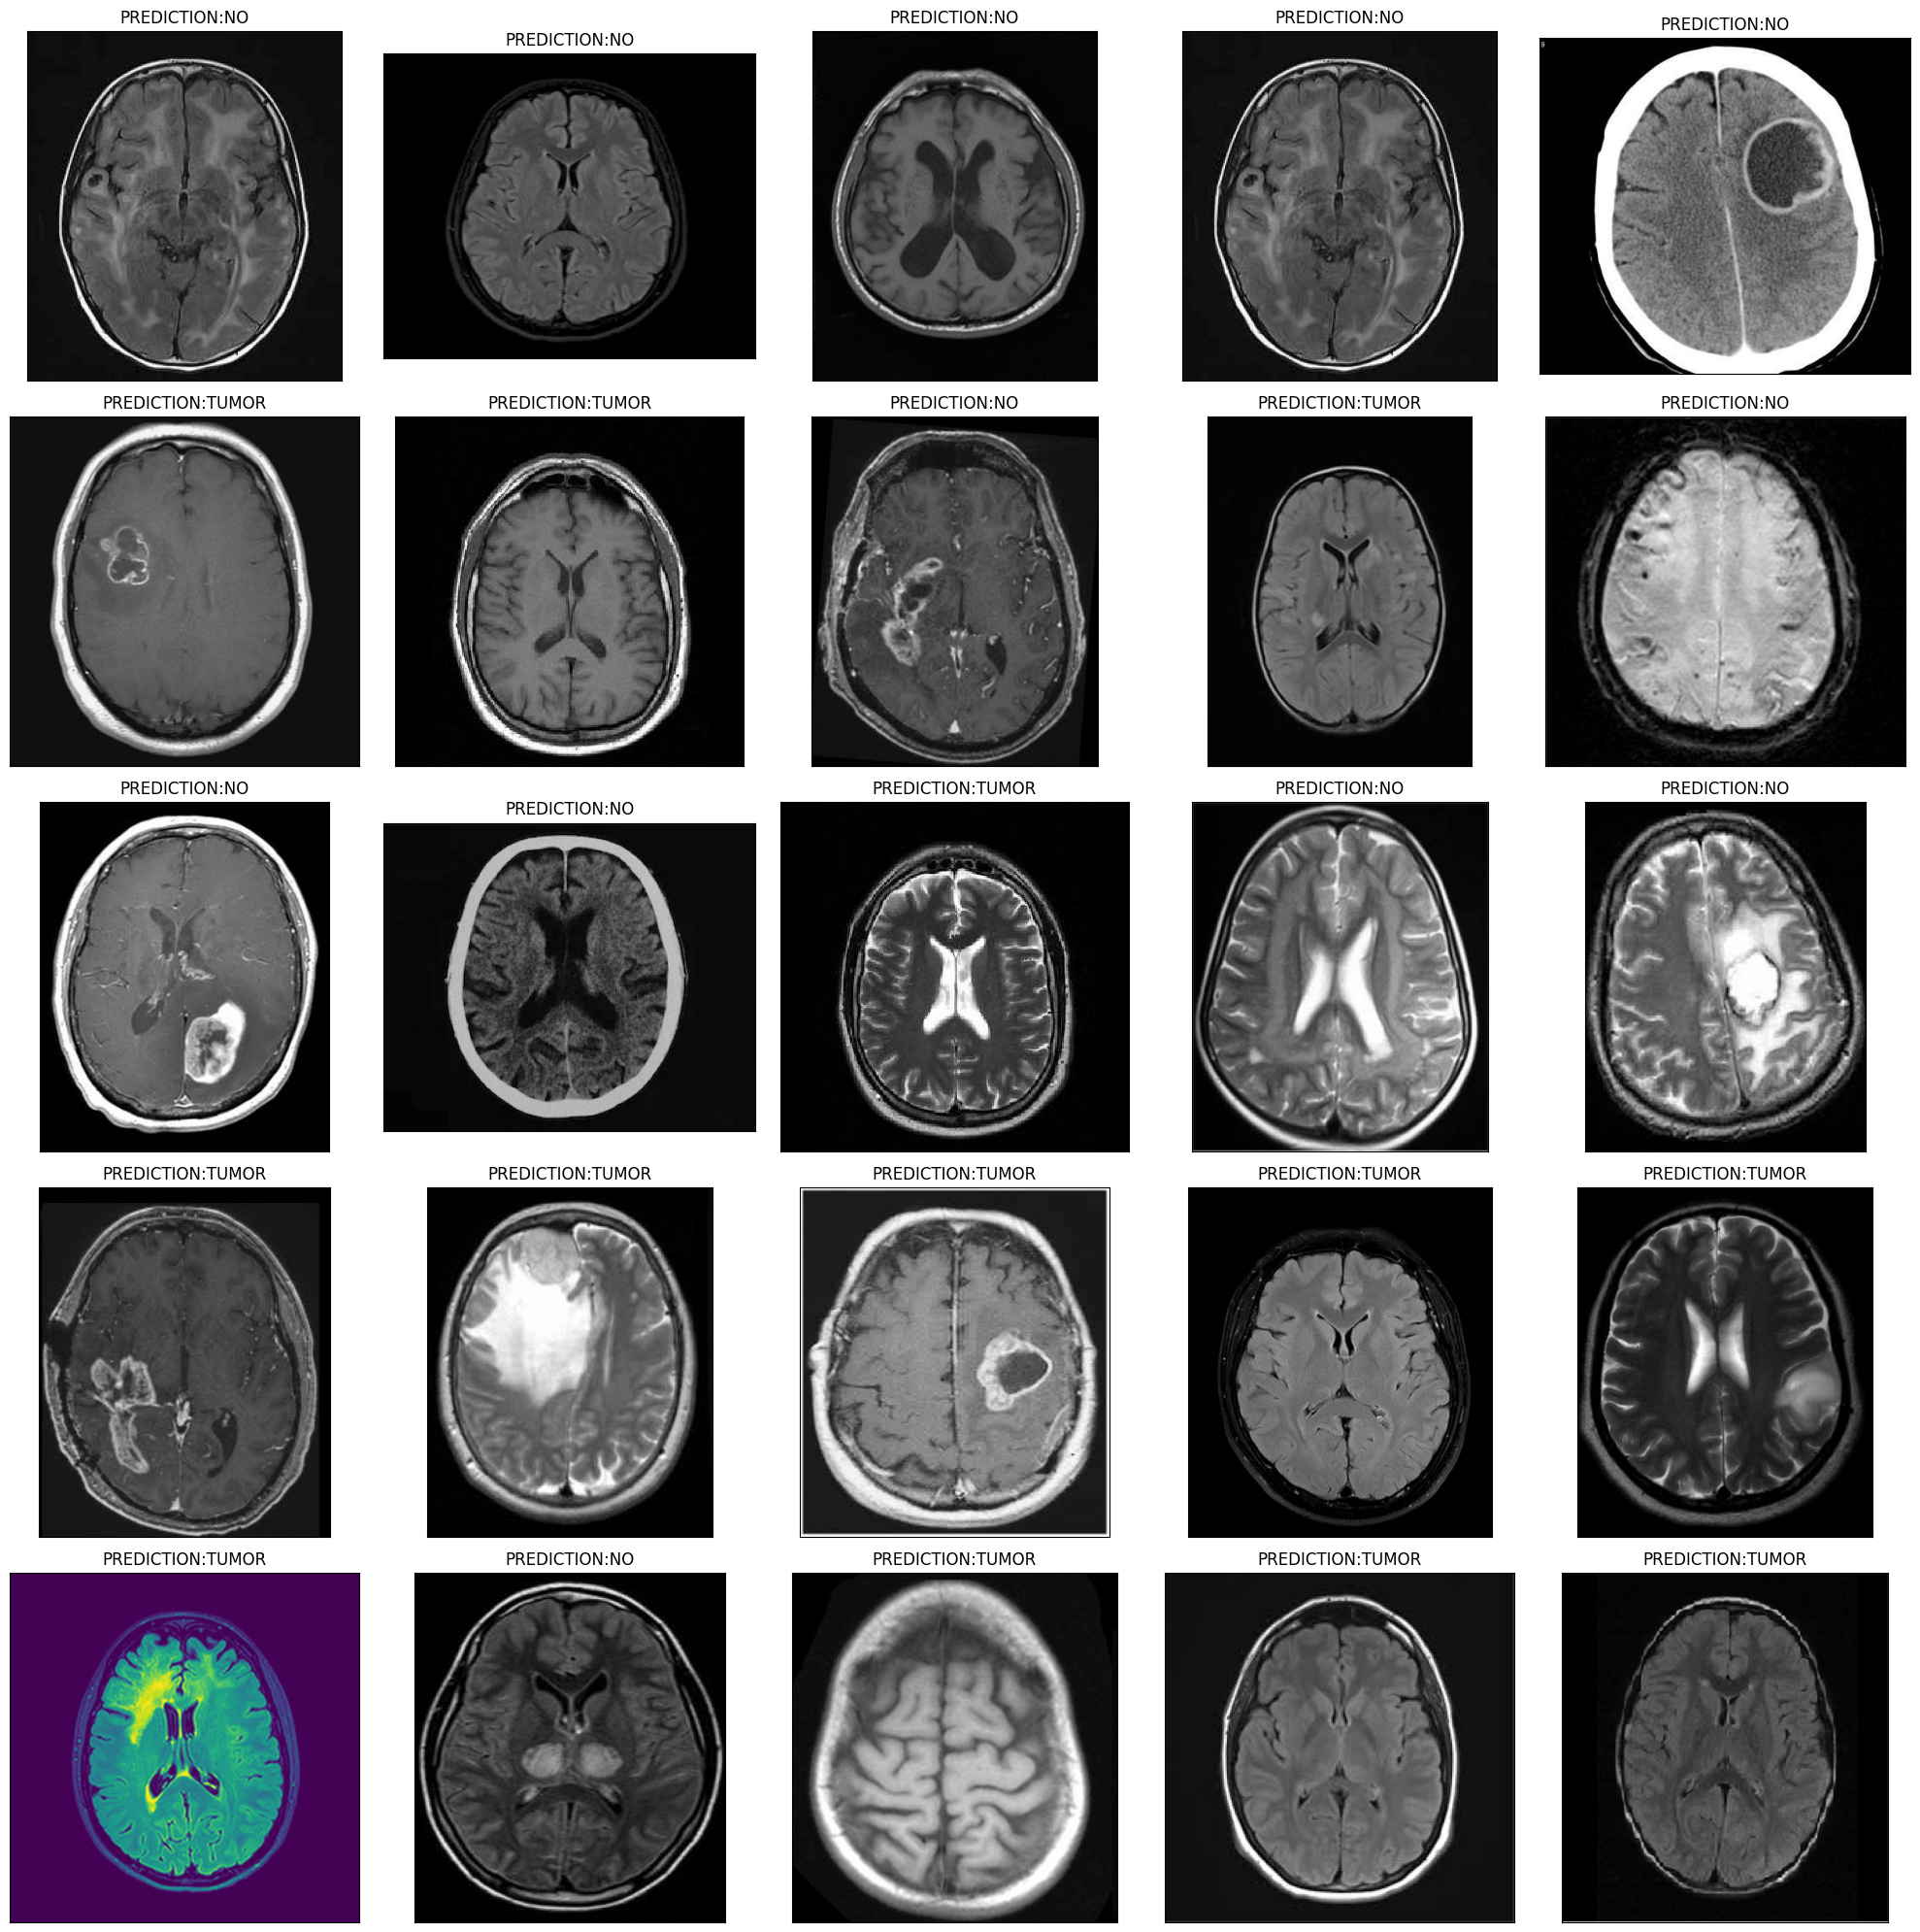

In [86]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction_Two[i]}")
plt.tight_layout()
plt.show()